# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.706404e+01     1.637080e+01
 * time: 0.0016031265258789062
     1     3.538057e+01     8.831754e+00
 * time: 0.004141092300415039
     2     2.385007e+01     3.311611e+00
 * time: 0.009932994842529297
     3     2.142072e+01     2.464787e+00
 * time: 0.014123201370239258
     4     2.022400e+01     1.888876e+00
 * time: 0.01917099952697754
     5     1.977342e+01     2.970251e+00
 * time: 0.02324700355529785
     6     1.939602e+01     1.584681e+00
 * time: 0.027734041213989258
     7     1.891088e+01     1.435680e+00
 * time: 0.03199005126953125
     8     1.850828e+01     1.053518e+00
 * time: 0.036161184310913086
     9     1.832698e+01     1.033567e+00
 * time: 0.04045510292053223
    10     1.820166e+01     8.811996e-01
 * time: 0.04478716850280762
    11     1.812358e+01     9.042787e-01
 * time: 0.04904603958129883
    12     1.806891e+01     6.992708e-01
 * time: 0.05246114730834961
    13     1.802457e+01     5.271142e-01
 

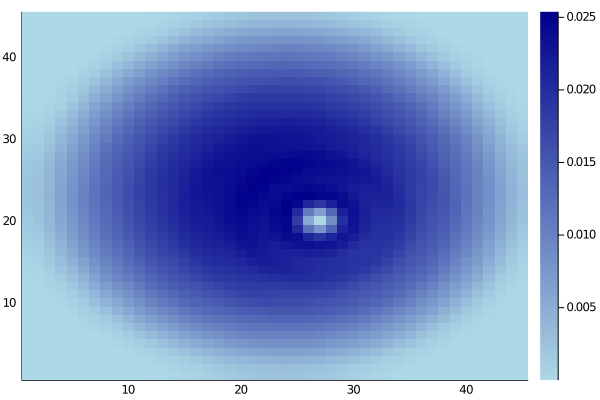

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)